<a href="https://colab.research.google.com/github/JRAlbanese/assignment3/blob/main/Copy_of_knn_kmc_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [2]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 5.95 MiB/s, done.
Resolving deltas: 100% (2/2), done.


   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0  

(1000, 5)  

User ID NA's:  0 

gender NA's:  0 

Age NA's:  0 

AnnualSalary NA's:  0 

Purchased NA's 0 

[44 45]


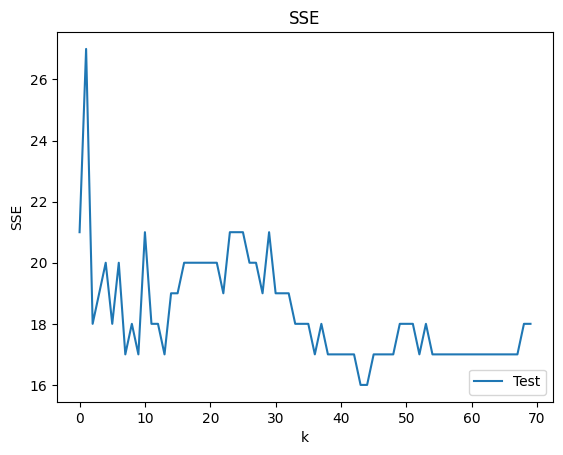

Accuracy is the following proportion:  0.08 

col_0       0   1
Purchased        
0          57  10
1          10  28
0.7578947368421053 0.8095238095238095


In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier

def pn(x, y = ""):
    print(x, y , '\n')
    return

#1------------------------------------------------------------------------------------------------------------------------------------------

df = pd.read_csv('./assignment3/data/car_data.csv')
pn(df.head())
pn(df.shape)
#1000 by 5

#2==============================================================================================================================================

userID_nas = df["User ID"].isna().sum()
gender_nas = df["Gender"].isna().sum()
Age_nas = df["Age"].isna().sum()
AnnualSalary_nas = df["AnnualSalary"].isna().sum()
Purchased_nas = df["Purchased"].isna().sum()

pn("User ID NA's: ", userID_nas)
pn("gender NA's: ", gender_nas)
pn("Age NA's: ", Age_nas)
pn("AnnualSalary NA's: ", AnnualSalary_nas)
pn("Purchased NA's", Purchased_nas)

#there are no missing data from what I can tell.

#Convert Gender to dummy
df.loc[ df["Gender"] == "Male", "gend"] = 0
df.loc[ df["Gender"] == "Female", "gend"] = 1

#feature matrix:
X = df.loc[:, ['Age', 'AnnualSalary']]
#Target variable vector:
y = df["Purchased"]

#3-----------------------------------------------------------------------------------------------------
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

#df.loc[:, ['Age', 'AnnualSalary']].apply(maxmin) --------> Don't need to do this, already created a feature matrix. instead, just:

X = X.apply(maxmin)
y = df["Purchased"]

#4---------------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

#5-----------------------------------------------------------------------------------------------------------------------


# Determine the optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) # Object to save the Sum of Squared Error
for k in range(k_bar):
 model = kNNClassifier(n_neighbors=k+1) # Create a sk model for k
 fitted_model = model.fit(X_train,y_train) # Train the model on our data
 y_hat = fitted_model.predict(X_test) # Predict values for test set
 SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)
plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

plt.title('SSE')
plt.show()


#graph and calculated optimal k match eachother at either k = 44 or 45

#6--------------------------------------------------------------------------------------------------------

model = kNNClassifier(n_neighbors = 44)  #we are now running the regressino at the optimal k
fitted_model = model.fit(X_train,y_train)  #train/fit the data using our designated training data to get coefficients
y_hat = fitted_model.predict(X_test) #predict the values: y_hat


pd.crosstab(y_test, y_hat) #see how they compare
#it seems like the model is pretty good. only 13 0's were incorrectly classified as 1's,
#and only 3 1's were incorrectly classified as 0's.
accuracy = 16/200
pn("Accuracy is the following proportion: ", accuracy)

#7------------------------------------------------------------------------------------------------------------------

X = df.loc[ : , ['Age','AnnualSalary','Gender']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

model = kNNClassifier(n_neighbors= 44)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train) # Training the model
y_hat = fitted_model.predict(X_test.drop('Gender',axis = 1)) #from HW solution: sum along columns

#The follow logic was also from solutions: was not sure how to specify sex. Answer seems obvious now of course
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
#and also for the true y values
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

print(pd.crosstab(y_F, y_hat_F))

#pd.crosstab(y_M, y_hat_M)

m_acc = (45+27)/(45+27+7+16)
f_acc = (57+28)/(57+28+10+10)

print(m_acc, f_acc)

#the female accuracy was slightly higher, by about 6%. In a large sample, such
#innacuracy in a model, perhaps with more severe consequences for error, could be very impactful.






**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

(2499, 3)  

Price NA's:  0 

year NA's:  0 

mileage NA's:  0 

      price      year   mileage
0      6300  0.744681  0.269287
1      2899  0.808511  0.187194
2      5350  0.957447  0.038892
3     25000  0.872340  0.063016
4     27700  0.957447  0.006537
...     ...       ...       ...
2494   7800  0.978723  0.023193
2495   9200  0.957447  0.033944
2496   9200  0.957447  0.031037
2497   9200  0.957447  0.031983
2498   9200  0.957447  0.030818

[2499 rows x 3 columns]  



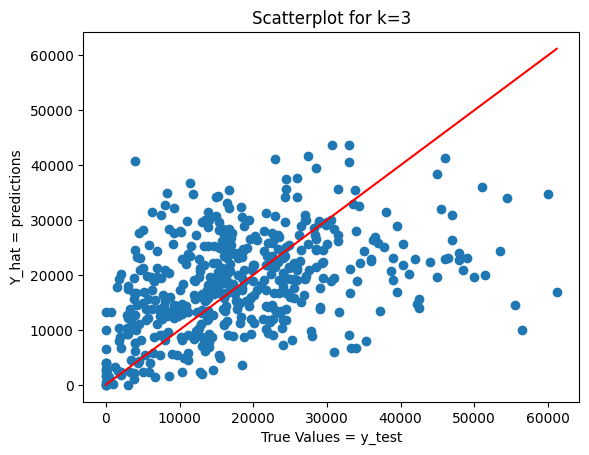

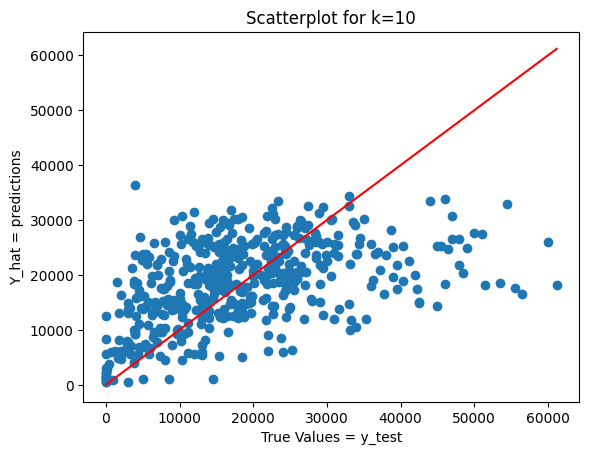

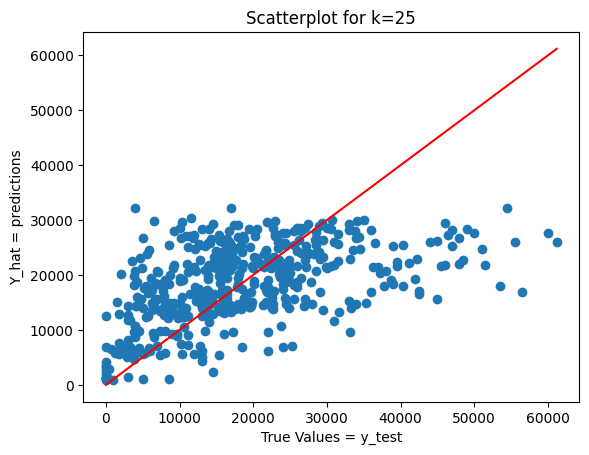

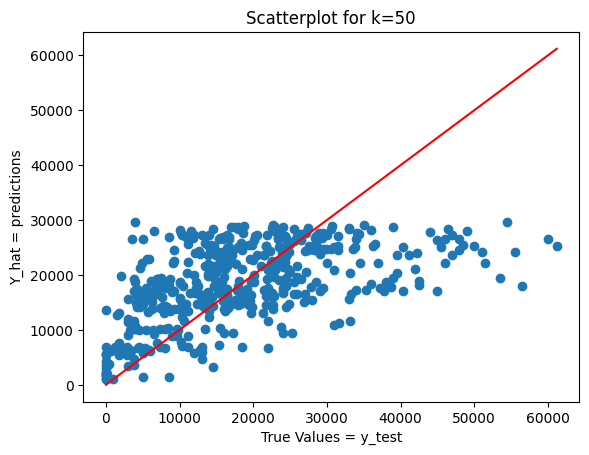

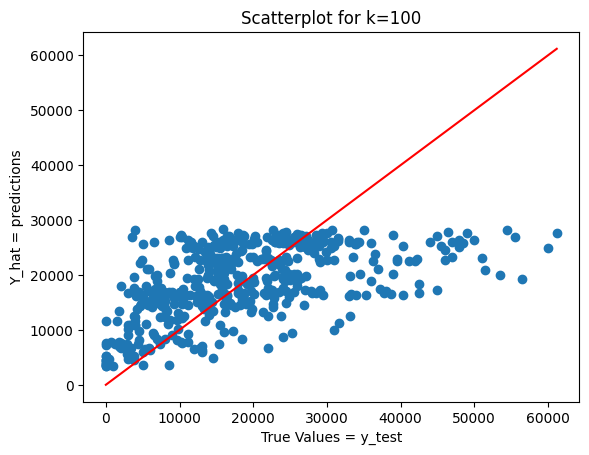

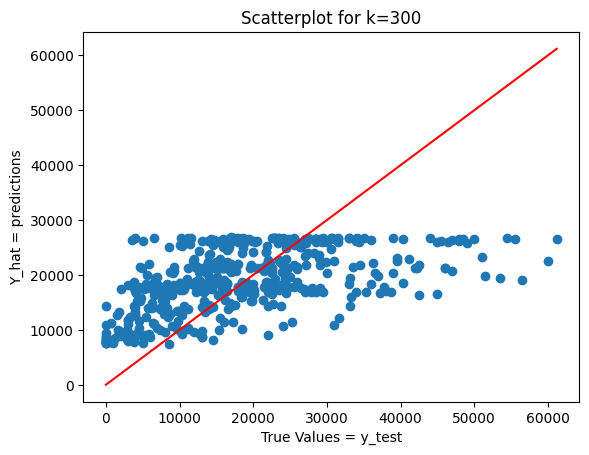

[1]  



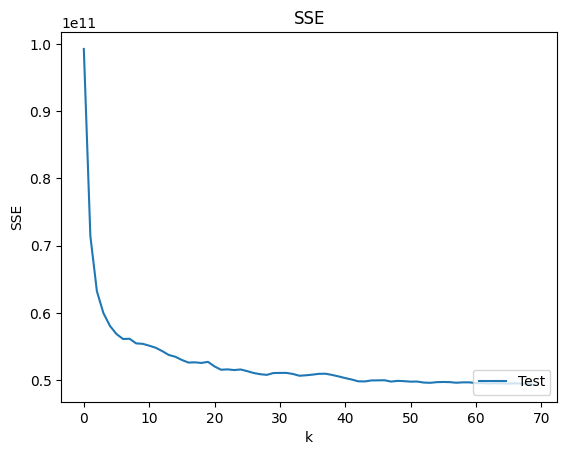

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

def pn(x, y = ""):
    print(x, y , '\n')
    return

#1------------------------------------------------------------------------------------------------------------------------------------------

df = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')

df2 = df.loc[ :, ["price", "year", "mileage"]]  #locate all rows [:] of these three columns
#pn(df2)

df2.head()
dimensions = df2.shape
pn(dimensions)                #the dimensions are: (2499 rows by 3 columns)

price_nas = df2["price"].isna().sum()
year_nas = df2["year"].isna().sum()
mileage_nas = df2["mileage"].isna().sum()

pn("Price NA's: ", price_nas)
pn("year NA's: ", year_nas)
pn("mileage NA's: ", mileage_nas)
#There are no NA's in these columns

#2---------------------------------------------------------------------------------------------------------------------------------------

def maxmin(i): #normalizing function
  i = (i - min(i))/(max(i) - min(i))
  return i

df2['year'] = maxmin(df2['year'])
df2['mileage'] = maxmin(df2['mileage'])
pn(df2)
#I think I could also do: df2['year', 'mileage'] = df2['year', 'mileage'].apply(maxmin)
#could also maybe do df2.loc[:, ['year', 'mileage'].apply(minmax)

#3,4------------------------------------------------------------------------------------------------------------------------------------------
X = df2[['year', 'mileage']]  #for some reason, need to put two brackets around each of these. It wasn't working otherwise
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100) #splits the data 80-train, 20-test
#Remember that the training process provides our model with the coefficients
#with which we will use in our regression.
#x,y train --> coefficients ---> use with x_test to find y-hat ---> compare y-hate with y-test to find SSE

ks = [3, 10, 25, 50, 100, 300]
SSE_list = []

# model_3 = kNNRegression(n_neighbors = ks[0])
# fitted_model_3 = model_3.fit(X_train,y_train) #fit the model using trained data

# y_hat_3 = fitted_model_3.predict(X_test)



#used chatgpt for this for loop: was confused how to make a scatterplot for each k in the list of k's
for k in ks:
    knn = kNNRegression(n_neighbors=k) #this will change for each indice in ks. k[0] = 3, k[1] = 10, etc.
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)

    SSE = np.sum((y_test - y_hat) ** 2) #formula for SSE
    SSE_list.append(SSE) #making a list of the standard error for each

    plt.scatter(y_test, y_hat)
    plt.title(f'Scatterplot for k={k}')
    plt.xlabel('True Values = y_test')
    plt.ylabel('Y_hat = predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y=x for reference
    plt.show()


#As K increases, the predicted value of y approaches 30,000 from the bottom.

#this_plot = sns.scatterplot(data = df2, x = "year", y = "price", hue = "mileage")

#5-------------------------------------------------------------------------------------------------------------------------------------------------------

# k_bar = 70    #we're gonna see how SSE changes as k varies, then pick the lowest SSE to find the optimal K
# k_grid = np.arange(1,k_bar)
# SSE_train = np.zeros(k_bar)
# SSE_test = np.zeros(k_bar)

# for k in range(k_bar):
#   model = kNNRegression(n_neighbors = k+1)
#   fitted_model = model.fit(X_train, y_train)
#   y_hat = fitted_model.predict(X_test)       #predicting values for the test set
#   SSE_test[k] = np.sum((y_test - y_hat)**2) #just the formula for SSE using true y (y_test) and y_hat
#   y_hat = fitted_model.predict(X_train)     #predicting values for training set
#   SSE_train[k] = np.sum((y_train - y_hat)**2) #SSE using y_train

# SSE_min = np.min(SSE) # Lowest recorded SSE
# min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
# k_star = k_grid[min_index] # Find the optimal value of k
# pn("Optimal K:" , k_star)

# plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
# plt.xlabel("k")
# plt.ylabel("SSE")
# plt.legend(loc='lower right')
# plt.title('SSE')
# plt.show()

#This is from the class notes:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
pn(k_star)

plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

#So, the graph indicates that k=1 is the optimal k for the lowest SSE, but looking at the graph,
#the SSE seems to be lowest (before seriously decreasing marginal change)
#around k = 20.



**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

<bound method NDFrame.head of           x1        x2 group
0   0.781279  0.851498     a
1   1.042835  0.931282     a
2   1.144129  0.882494     a
3   0.968445  0.896508     a
4   1.122665  1.013608     a
..       ...       ...   ...
45  5.144996  2.890534     c
46  5.087773  3.014701     c
47  4.839512  2.880229     c
48  5.190288  2.764861     c
49  4.977505  3.022793     c

[150 rows x 3 columns]>


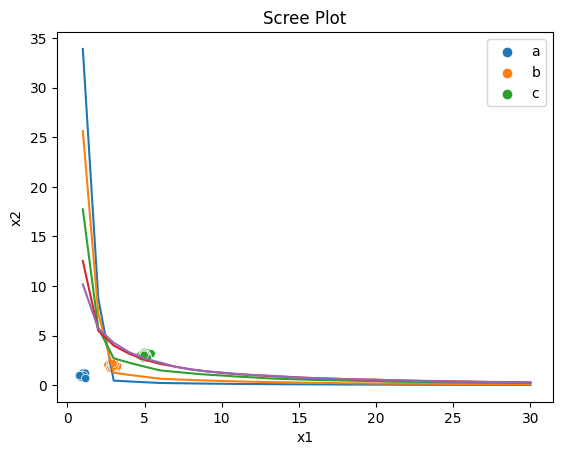

In [107]:
#Base Code:
import numpy as np
import pandas as pd
#from the given:
def createData(noise,N=50):
 np.random.seed(100) # Set the seed for replicability
 # Generate (x1,x2,g) triples:
 X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
 X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
 X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
 # Concatenate into one data frame
 gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
 gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
 gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
 df = pd.concat([gdf1,gdf2,gdf3],axis=0)
 return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

#2-------------------------------------------------------------------------------------------------------
print(df0_125.head)
#right from notes:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group')
#sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group')
#sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group')
#sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group')
#sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group')

#as the noise increases (from .125 to 2.0), the clusters become less distinct

#3----------------------------------------------------------------------------------------------------------------------------------------
#from our class notes, just with adjusted k_bar:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 30
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

#It seems that there is a pronounced turning point or "elbow" at around k = 3 or 4

#.25
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data


k_bar = 30
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

#.5
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data


k_bar = 30
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

#1
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data


k_bar = 30
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

#2
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data


k_bar = 30
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot


#The kinks at 2 and 1 seem to be closer to k=1 or k=2. The elbow is less prominent at 2



#4---------------------------------------------------------------------------------------
#The intuition of an elbow is reminiscent of the idea of decreasing marginal utility in
#economics. As you consume more and more of something, either suddenly or over time gradually
#you will experience less and less utility from that consumption. In the case of elbows
#in this specific setting: as we keep adding more and more centroids, k, the marginal benefit
#of those k's decreases. Additionally, as noise increases, the elbow become more difficult to see.
#I.e. that was sort of a ramble: If there is too much noise, we won't get much more of a beenfit from adding k's,
#since there aren't that many clusters in the first place, if at all.





**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?